In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV


In [58]:
df = pd.read_csv('DATASETS/new_file.csv')

In [59]:
df.shape

(6362620, 10)

In [60]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [61]:
df_small = df.sample(200000, random_state=42)

In [62]:
df_small.shape

(200000, 10)

In [63]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [64]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 3737323 to 1027972
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            200000 non-null  int64  
 1   type            200000 non-null  object 
 2   amount          200000 non-null  float64
 3   nameOrig        200000 non-null  object 
 4   oldbalanceOrg   200000 non-null  float64
 5   newbalanceOrig  200000 non-null  float64
 6   nameDest        200000 non-null  object 
 7   oldbalanceDest  200000 non-null  float64
 8   newbalanceDest  200000 non-null  float64
 9   isFraud         200000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 16.8+ MB


In [65]:
df_small.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [66]:
# there are no missing values

In [67]:
df_small['isFraud'].unique()

array([0, 1])

In [68]:
# no unique values

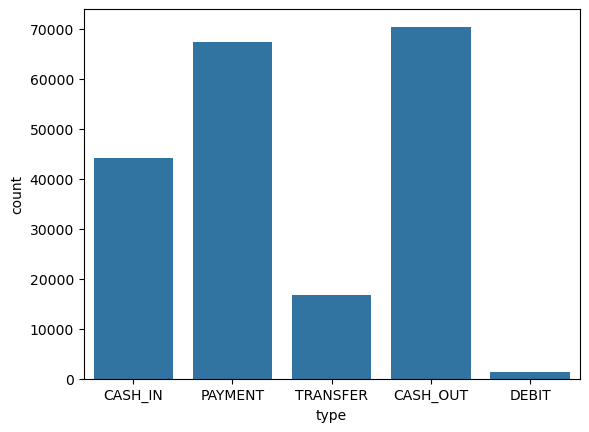

In [69]:
sns.countplot(x='type',data=df_small)
plt.show()

In [70]:
# most payments are cash_out and payment type

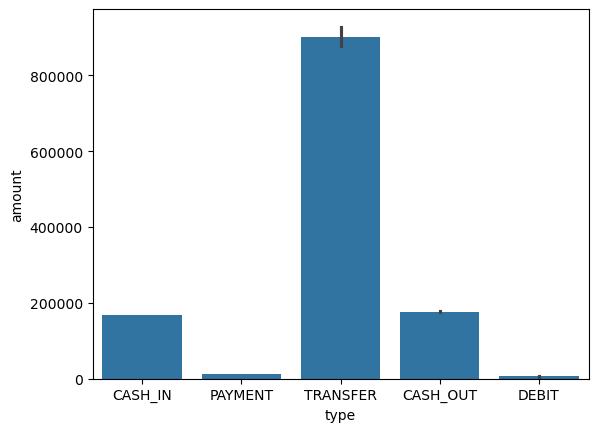

In [71]:
sns.barplot(x='type',y='amount',data=df_small)
plt.show()

In [72]:
# transfer and cashout has high avg of amounts making them primary for fraud targets

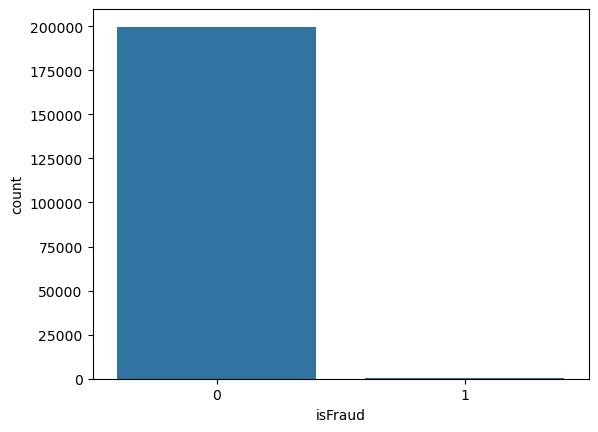

In [73]:
sns.countplot(x='isFraud',data=df_small)
plt.show()

In [74]:
df_small['isFraud'].value_counts()

isFraud
0    199732
1       268
Name: count, dtype: int64

In [75]:
# The dataset is highly imbalanced because fraud cases are very few compared to normal transactions.
# To fix this, we use SMOTE (Synthetic Minority Oversampling Technique).

In [76]:
df_small

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0
...,...,...,...,...,...,...,...,...,...,...
670946,36,TRANSFER,717358.21,C158880018,67206.00,0.00,C1233764496,0.00,820891.43,0
3032934,234,CASH_OUT,160399.88,C802841322,10669.00,0.00,C2088303780,241331.72,401731.60,0
4751985,333,TRANSFER,3270141.36,C1008303693,0.00,0.00,C1759785083,3330825.38,6600966.74,0
1239897,134,CASH_IN,373726.88,C1002035443,1655191.80,2028918.68,C237869347,2640312.13,2266585.25,0


In [77]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 3737323 to 1027972
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            200000 non-null  int64  
 1   type            200000 non-null  object 
 2   amount          200000 non-null  float64
 3   nameOrig        200000 non-null  object 
 4   oldbalanceOrg   200000 non-null  float64
 5   newbalanceOrig  200000 non-null  float64
 6   nameDest        200000 non-null  object 
 7   oldbalanceDest  200000 non-null  float64
 8   newbalanceDest  200000 non-null  float64
 9   isFraud         200000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 16.8+ MB


In [78]:
# one-hot encoding for type column

In [79]:
new_type = pd.get_dummies(df_small['type'],drop_first=True)
new_df = pd.concat([df_small,new_type],axis=1)

In [80]:
new_df['org_diff'] = new_df['oldbalanceOrg'] - new_df['newbalanceOrig']
new_df['dest_diff'] = new_df['newbalanceDest'] - new_df['oldbalanceDest']

In [81]:
# adding 2 new columns org_diff and dest_diff

In [82]:
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,org_diff,dest_diff
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,False,False,False,False,-330218.42,-330218.42
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,False,False,True,False,11647.08,0.00
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,False,False,False,False,-152264.21,-152264.21
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,False,False,False,True,0.00,1551760.63
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,False,False,False,False,-78172.30,-78172.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670946,36,TRANSFER,717358.21,C158880018,67206.00,0.00,C1233764496,0.00,820891.43,0,False,False,False,True,67206.00,820891.43
3032934,234,CASH_OUT,160399.88,C802841322,10669.00,0.00,C2088303780,241331.72,401731.60,0,True,False,False,False,10669.00,160399.88
4751985,333,TRANSFER,3270141.36,C1008303693,0.00,0.00,C1759785083,3330825.38,6600966.74,0,False,False,False,True,0.00,3270141.36
1239897,134,CASH_IN,373726.88,C1002035443,1655191.80,2028918.68,C237869347,2640312.13,2266585.25,0,False,False,False,False,-373726.88,-373726.88


In [83]:
X = new_df.drop(['type','nameOrig','nameDest','isFraud'],axis=1)
y = new_df['isFraud']

In [84]:
# dropping maneOrig and nameDest as they are not much important

In [85]:
X.shape,y.shape

((200000, 12), (200000,))

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
# scaling StandardScaler

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# applying SMOTE for imbalanced data

In [90]:
import imblearn
print("Installed!")

Installed!


In [91]:
sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

In [92]:
y_train.value_counts()

isFraud
0    159791
1       209
Name: count, dtype: int64

In [93]:
y_train_resampled.value_counts()

isFraud
0    159791
1    159791
Name: count, dtype: int64

In [94]:
# training and testing

In [95]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}
for name,model in models.items():
    model.fit(X_train_resampled,y_train_resampled)

    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print("-----", name, "-----")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print()

----- Logistic Regression -----
Accuracy : 0.973975
Precision: 0.051188299817184646
Recall   : 0.9491525423728814
F1 Score : 0.0971379011274935

----- Random Forest -----
Accuracy : 0.998825
Precision: 0.5666666666666667
Recall   : 0.864406779661017
F1 Score : 0.6845637583892618

----- XGBoost -----
Accuracy : 0.99755
Precision: 0.36551724137931035
Recall   : 0.8983050847457628
F1 Score : 0.5196078431372549

